In [2]:
%load_ext autoreload

In [9]:
# %autoreload 2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import utilssphering

In [2]:
# Read CSVs

match_rep_df = pd.read_csv("checkpoints/match_rep_df.csv")
match_rep_df

,Vendor,Batch,Plate_Map_Name,Assay_Plate_Barcode,Modality,Images_per_well,Sites-SubSampled,Binning,Magnification,Number_of_channels,...,Size_MB_std,channel_names,brightfield_z_plane_used,feature_channels_found,sphering,value_95_replicating,Percent_Replicating,Percent_Matching,value_95_matching,cell_count
0,MolDev,Scope1_MolDev_10X,JUMP-MOA_compound_platemap,Plate2_PCO_6ch_4site_10XPA,Confocal,4,NaN,1,10,6,...,0.000144,"Actin, DNA, ER, Golgi, Mito, RNA",NaN,"Actin, DNA, ER, Golgi, Mito, RNA",True,0.200046,57.777778,20.930233,0.303191,2014937
1,MolDev,Scope1_MolDev_10X,JUMP-MOA_compound_platemap,Plate2_PCO_6ch_4site_10XPA,Confocal,4,NaN,1,10,6,...,0.000144,"Actin, DNA, ER, Golgi, Mito, RNA",NaN,"Actin, DNA, ER, Golgi, Mito, RNA",False,0.420650,35.555556,16.279070,0.307224,2014937
2,MolDev,Scope1_MolDev_10X,JUMP-MOA_compound_platemap,Plate3_PCO_6ch_4site_10XPA_Crest,Confocal,4,NaN,1,10,6,...,0.000183,"Actin, DNA, ER, Golgi, Mito, RNA",NaN,"Actin, DNA, ER, Golgi, Mito, RNA",True,0.268013,62.222222,20.930233,0.401802,2413350
3,MolDev,Scope1_MolDev_10X,JUMP-MOA_compound_platemap,Plate3_PCO_6ch_4site_10XPA_Crest,Confocal,4,NaN,1,10,6,...,0.000183,"Actin, DNA, ER, Golgi, Mito, RNA",NaN,"Actin, DNA, ER, Golgi, Mito, RNA",False,0.338900,47.777778,16.279070,0.411854,2413350
4,MolDev,Scope1_MolDev_10X_4siteZ,JUMP-MOA_compound_platemap,Plate3_PCO_6ch_4site_10XPA_Crestz,Confocal,4,NaN,1,10,6,...,0.000142,"Actin, DNA, ER, Golgi, Mito, RNA",NaN,"Actin, DNA, ER, Golgi, Mito, RNA",True,0.205121,66.666667,23.255814,0.363114,2381443
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357,Yokogawa_US,4siteSubSample_Scope1_Yokogawa_US_20X_6Ch_BRO0...,JUMP-MOA_compound_platemap,BRO0117059_20X,Confocal,9,4.0,1,20,6,...,0.000583,"AGP, BrightField, DNA, ER, Mito, RNA",Z08,"AGP, BrightField, DNA, ER, Mito, RNA",False,0.628379,20.000000,6.976744,0.772160,489099
358,Yokogawa_US,4siteSubSample_Scope1_Yokogawa_US_20X_6Ch_BRO0...,JUMP-MOA_compound_platemap,BRO01177034_20x,Confocal,9,4.0,1,20,6,...,0.000014,"AGP, BrightField, DNA, ER, Mito, RNA",Z17,"AGP, BrightField, DNA, ER, Mito, RNA",True,0.139090,56.666667,18.604651,0.193171,452567
359,Yokogawa_US,4siteSubSample_Scope1_Yokogawa_US_20X_6Ch_BRO0...,JUMP-MOA_compound_platemap,BRO01177034_20x,Confocal,9,4.0,1,20,6,...,0.000014,"AGP, BrightField, DNA, ER, Mito, RNA",Z17,"AGP, BrightField, DNA, ER, Mito, RNA",False,0.666818,21.111111,9.302326,0.790813,452567
360,Yokogawa_US,4siteSubSample_Scope1_Yokogawa_US_40X_BRO0117059,JUMP-MOA_compound_platemap,BRO0117059_40x,Confocal,9,4.0,1,40,6,...,0.080201,"AGP, BrightField, DNA, ER, Mito, RNA",Z08,"AGP, BrightField, DNA, ER, Mito, RNA",True,0.193787,53.333333,20.930233,0.234702,116595


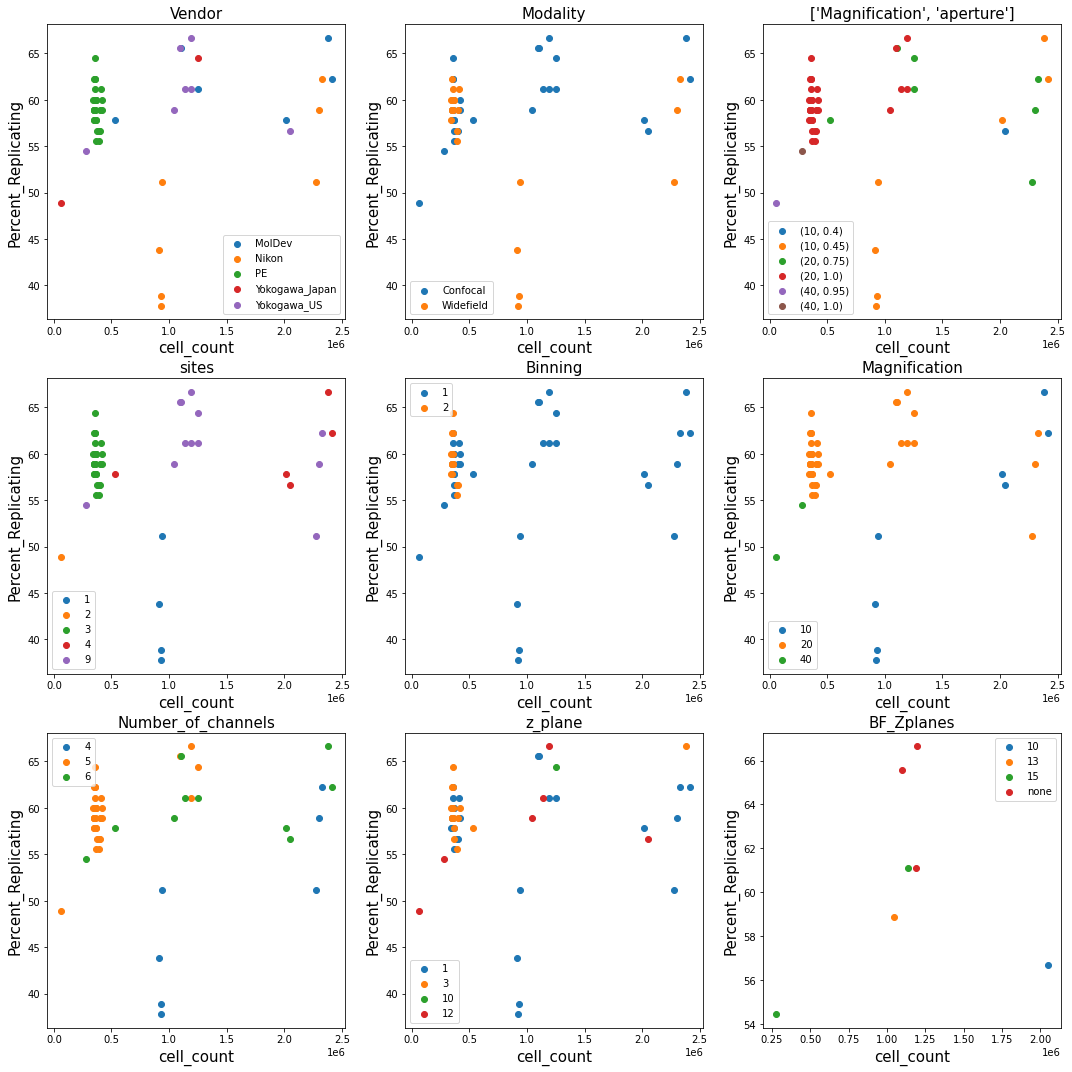

In [11]:
group_columns = ["Vendor", "Modality", ["Magnification", "aperture"], "sites", 
                "Binning", "Magnification", "Number_of_channels", "z_plane", 
                "BF_Zplanes"]
subplots = np.arange(len(group_columns)).reshape(-1,3).shape

df_subset = match_rep_df[(~match_rep_df["Batch"].str.contains("siteSubSample")) & (match_rep_df["sphering"] == True)]

fig, ax = plt.subplots(subplots[0], subplots[1], figsize=(15,15))
for i, _ax in zip(group_columns, ax.flatten()):
    utilssphering.group_plot(df_subset, "cell_count", "Percent_Replicating", group=i, fig=fig, ax_=_ax, legend=True)
fig.savefig("figures/rep_vs_cell-count_no_subsamples.png")

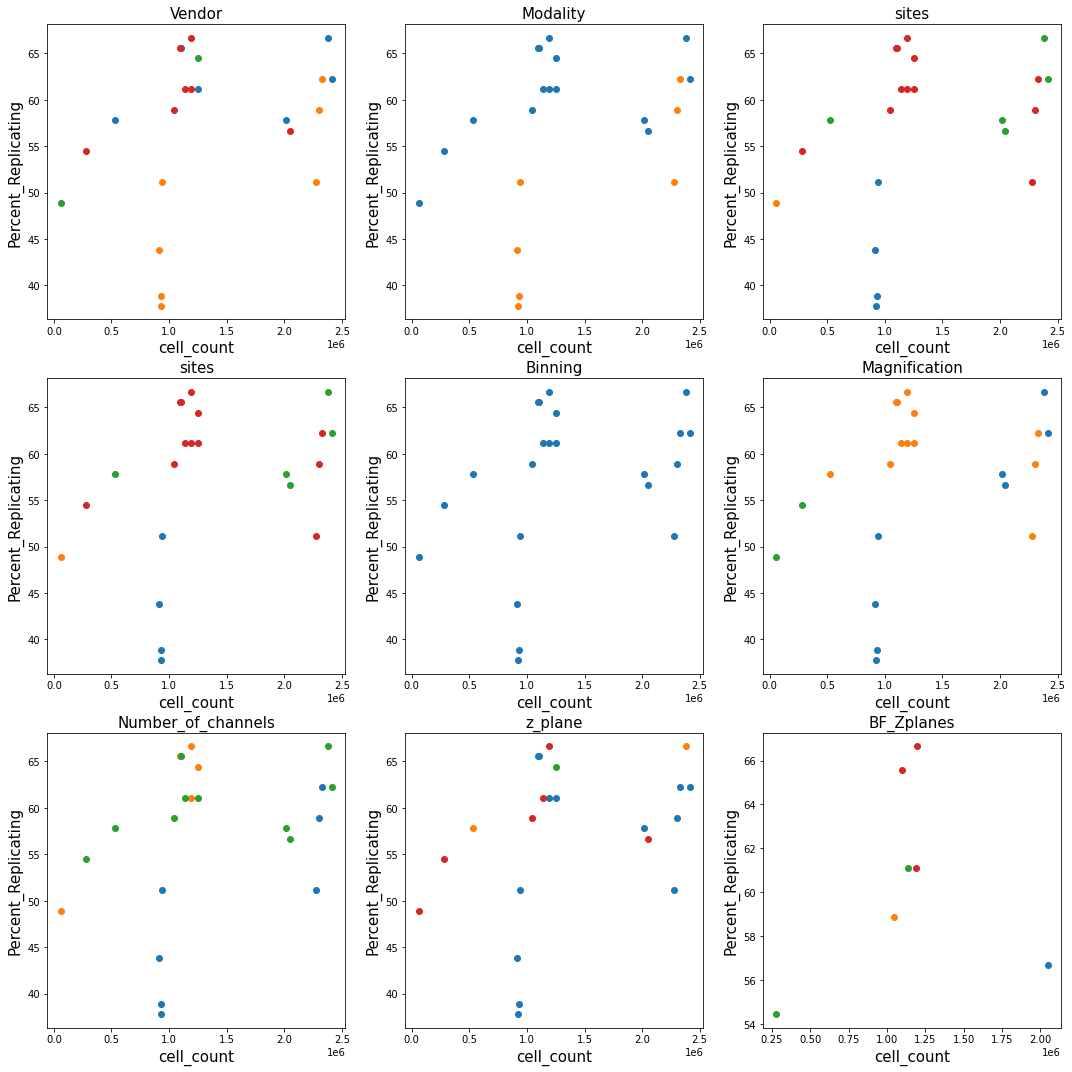

In [12]:
group_columns = ["Vendor", "Modality", "sites", "sites", 
                "Binning", "Magnification", "Number_of_channels", "z_plane", 
                "BF_Zplanes"]
subplots = np.arange(len(group_columns)).reshape(-1,3).shape

df_subset = match_rep_df[(~match_rep_df["Batch"].str.contains("siteSubSample")) & (match_rep_df["sphering"] == True) & (~match_rep_df["Vendor"].str.contains("PE"))]

fig, ax = plt.subplots(subplots[0], subplots[1], figsize=(15,15))
for i, _ax in zip(group_columns, ax.flatten()):
    utilssphering.group_plot(df_subset, "cell_count", "Percent_Replicating", group=i, fig=fig, ax_=_ax)
# fig.savefig("figures/rep_vs_cell-count_NO_PE.png")


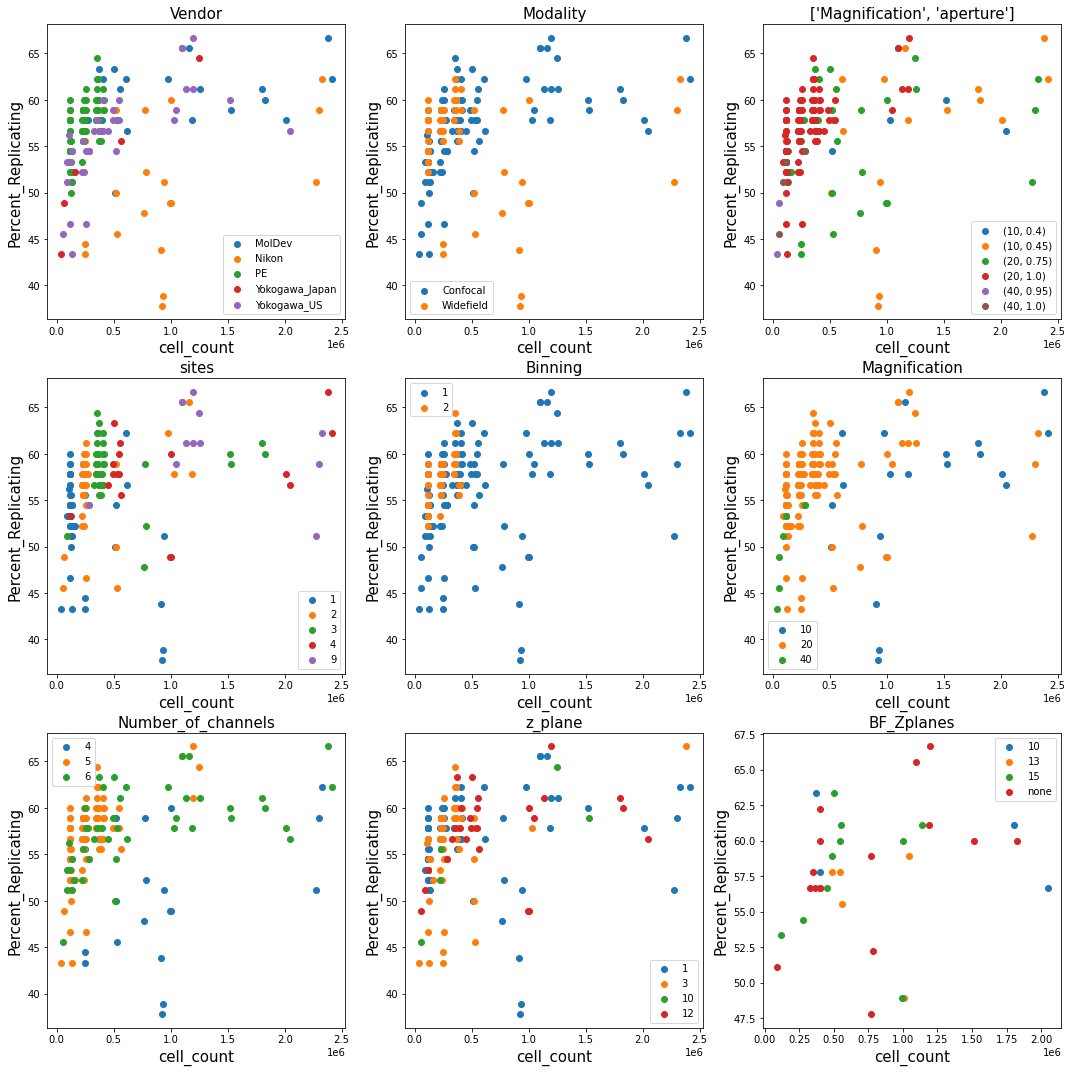

In [14]:
group_columns = ["Vendor", "Modality", ["Magnification", "aperture"], "sites", 
                "Binning", "Magnification", "Number_of_channels", "z_plane", 
                "BF_Zplanes"]
subplots = np.arange(len(group_columns)).reshape(-1,3).shape

df_subset = match_rep_df[(match_rep_df["sphering"] == True)]

fig, ax = plt.subplots(subplots[0], subplots[1], figsize=(15,15))
for i, _ax in zip(group_columns, ax.flatten()):
    utilssphering.group_plot(df_subset, "cell_count", "Percent_Replicating", group=i, fig=fig, ax_=_ax, legend=True)
fig.savefig("figures/rep_vs_cell-count_WITH_subsamples.png")

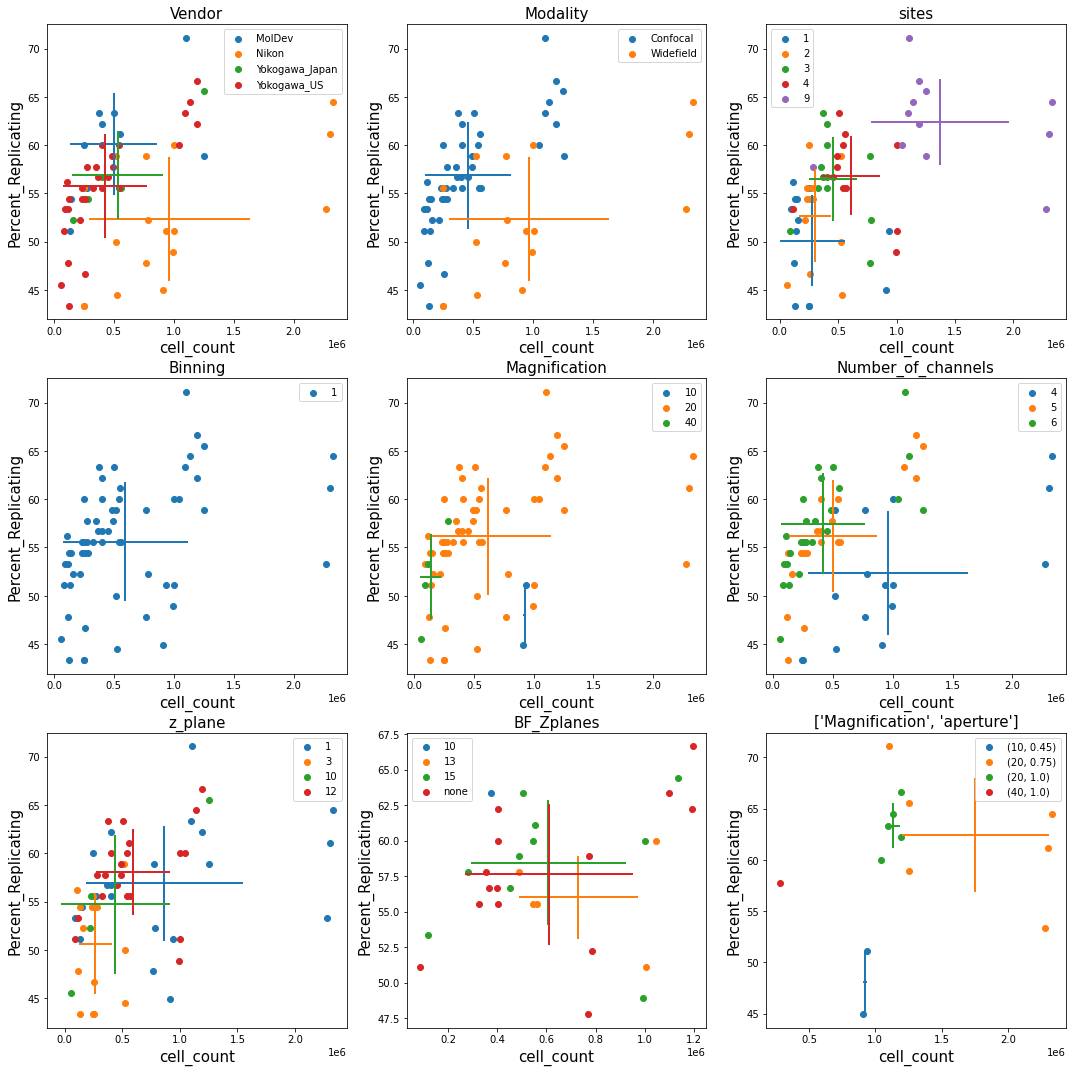

In [64]:
group_columns = ["Vendor", "Modality", "sites", 
                "Binning", "Magnification", "Number_of_channels", "z_plane", 
                "BF_Zplanes", ["Magnification", "aperture"]]
subplots = np.arange(len(group_columns)).reshape(-1,3).shape

plot_plates = match_rep_df[match_rep_df["sites"] == 9]["Assay_Plate_Barcode"].values

additional_cols = {
    "col1": ["cell_count", "Mean_Cell_Count", lambda x: np.mean(x)],
    "col2": ["cell_count", "SD_Cell_Count", lambda z: float('%.3f'%np.std(z))]
}

df_subset = match_rep_df[(match_rep_df["Assay_Plate_Barcode"].str.contains("|".join(plot_plates))) & 
                        (match_rep_df["sphering"] == True) 
                        ]

# group_df = utilssphering.find_group_avg_df(df_subset, "Vendor", add_cols=additional_cols)
# group_df

fig, ax = plt.subplots(subplots[0], subplots[1], figsize=(15,15))
for i, _ax in zip(group_columns, ax.flatten()):
    try:
        group_df = utilssphering.find_group_avg_df(df_subset, i, add_cols=additional_cols)
    except:
        print("Found ya None")
    try:
        utilssphering.group_plot(
            df=group_df, 
            x="Mean_Cell_Count", 
            y="Mean_Percent_Replicating",
            group=i,
            error_x="SD_Cell_Count",
            error_y="SD_Percent_Replicating",
            fig=fig,
            ax_=_ax
        )
        utilssphering.group_plot(df_subset, "cell_count", "Percent_Replicating", group=i, fig=fig, ax_=_ax, legend=True)
    except Exception as e:
        print(e)
        fig.delaxes(_ax)
fig.savefig("figures/rep_vs_cell-count-for-9site_and_subsamples_WITH_ERROR.png")


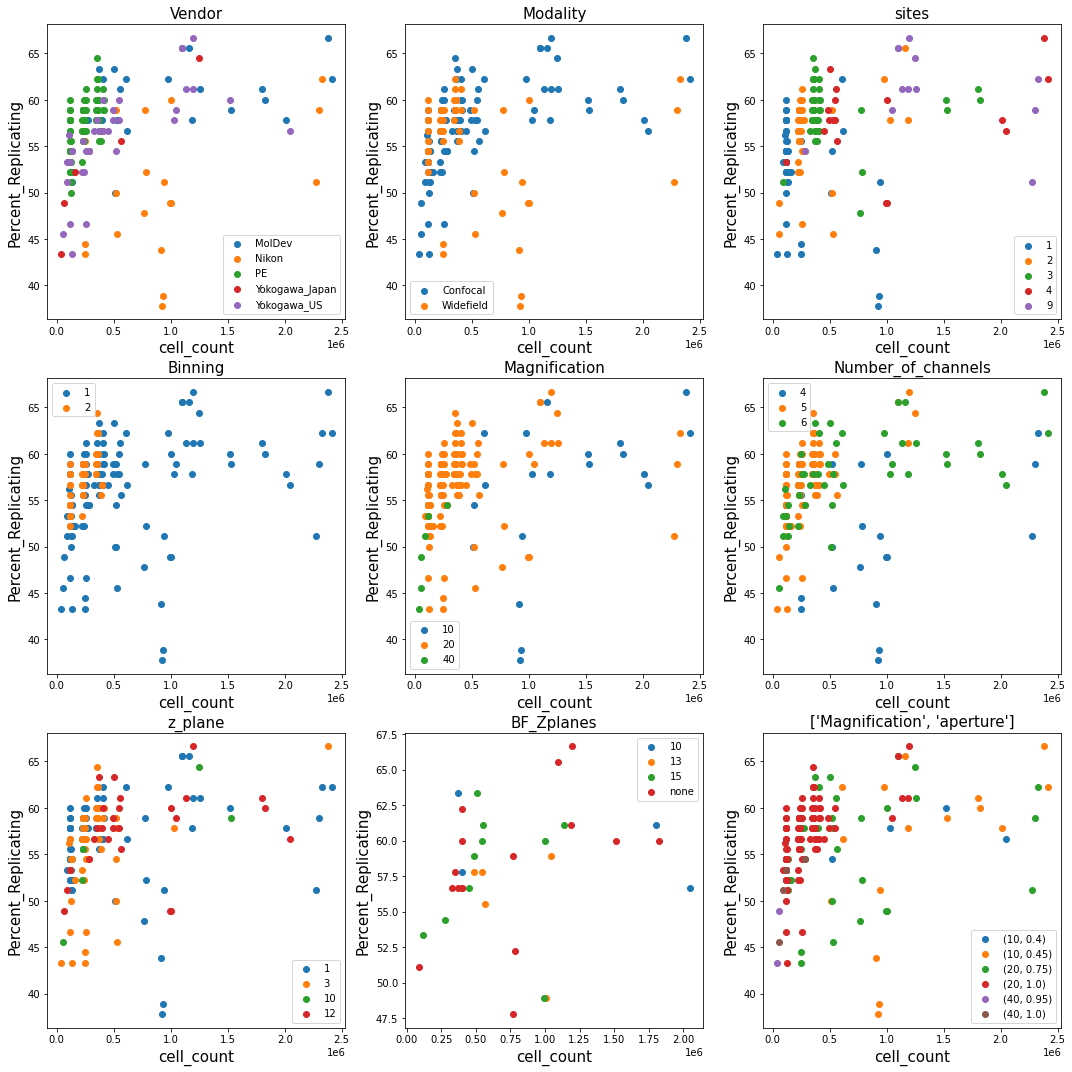

In [19]:
group_columns = ["Vendor", "Modality", "sites", 
                "Binning", "Magnification", "Number_of_channels", "z_plane", 
                "BF_Zplanes", ["Magnification", "aperture"]]
subplots = np.arange(len(group_columns)).reshape(-1,3).shape


additional_cols = {
    "col1": ["cell_count", "Mean_Cell_Count", lambda x: np.mean(x)],
    "col2": ["cell_count", "SD_Cell_Count", lambda z: float('%.3f'%np.std(z))]
}

df_subset = match_rep_df[
                        (match_rep_df["sphering"] == True) 
                        ]

# group_df = utilssphering.find_group_avg_df(df_subset, "Vendor", add_cols=additional_cols)
# group_df

fig, ax = plt.subplots(subplots[0], subplots[1], figsize=(15,15))
for i, _ax in zip(group_columns, ax.flatten()):
    try:
        group_df = utilssphering.find_group_avg_df(df_subset, i, add_cols=additional_cols)
    except:
        print("Found ya None")
    try:
        # utilssphering.group_plot(
        #     df=group_df, 
        #     x="Mean_Cell_Count", 
        #     y="Mean_Percent_Replicating",
        #     group=i,
        #     error_x="SD_Cell_Count",
        #     error_y="SD_Percent_Replicating",
        #     fig=fig,
        #     ax_=_ax
        # )
        utilssphering.group_plot(df_subset, "cell_count", "Percent_Replicating", group=i, fig=fig, ax_=_ax, legend=True)
    except Exception as e:
        print(e)
        fig.delaxes(_ax)
# fig.savefig("figures/rep_vs_cell-count-for-all-samples_WITHOUT_ERROR.png")


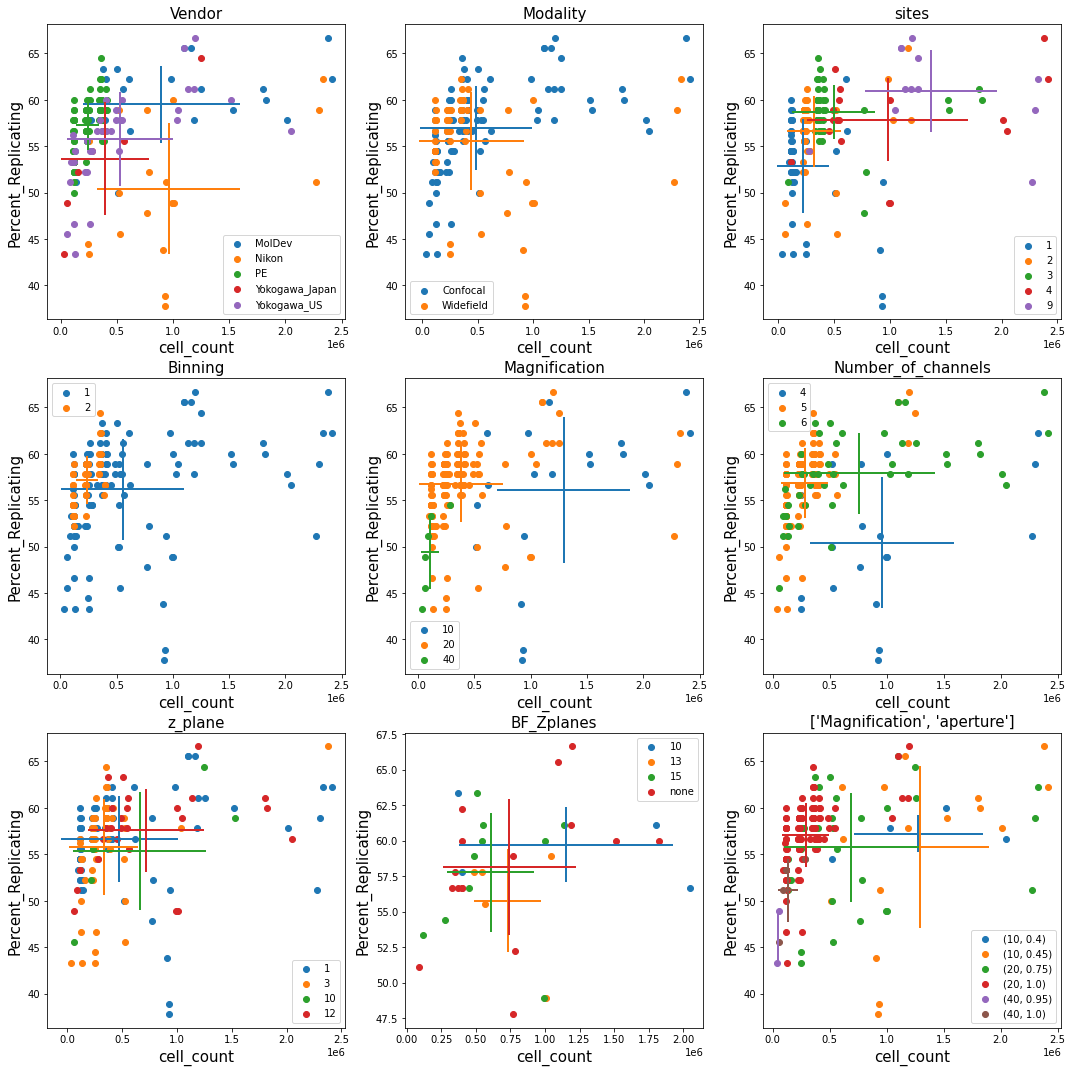

In [18]:
group_columns = ["Vendor", "Modality", "sites", 
                "Binning", "Magnification", "Number_of_channels", "z_plane", 
                "BF_Zplanes", ["Magnification", "aperture"]]
subplots = np.arange(len(group_columns)).reshape(-1,3).shape


additional_cols = {
    "col1": ["cell_count", "Mean_Cell_Count", lambda x: np.mean(x)],
    "col2": ["cell_count", "SD_Cell_Count", lambda z: float('%.3f'%np.std(z))]
}

df_subset = match_rep_df[
                        (match_rep_df["sphering"] == True) 
                        ]

# group_df = utilssphering.find_group_avg_df(df_subset, "Vendor", add_cols=additional_cols)
# group_df

fig, ax = plt.subplots(subplots[0], subplots[1], figsize=(15,15))
for i, _ax in zip(group_columns, ax.flatten()):
    try:
        group_df = utilssphering.find_group_avg_df(df_subset, i, add_cols=additional_cols)
    except:
        print("Found ya None")
    try:
        utilssphering.group_plot(
            df=group_df, 
            x="Mean_Cell_Count", 
            y="Mean_Percent_Replicating",
            group=i,
            error_x="SD_Cell_Count",
            error_y="SD_Percent_Replicating",
            fig=fig,
            ax_=_ax
        )
        utilssphering.group_plot(df_subset, "cell_count", "Percent_Replicating", group=i, fig=fig, ax_=_ax, legend=True)
    except Exception as e:
        print(e)
        fig.delaxes(_ax)
# fig.savefig("figures/rep_vs_cell-count-for-all-samples_WITH_ERROR.png")


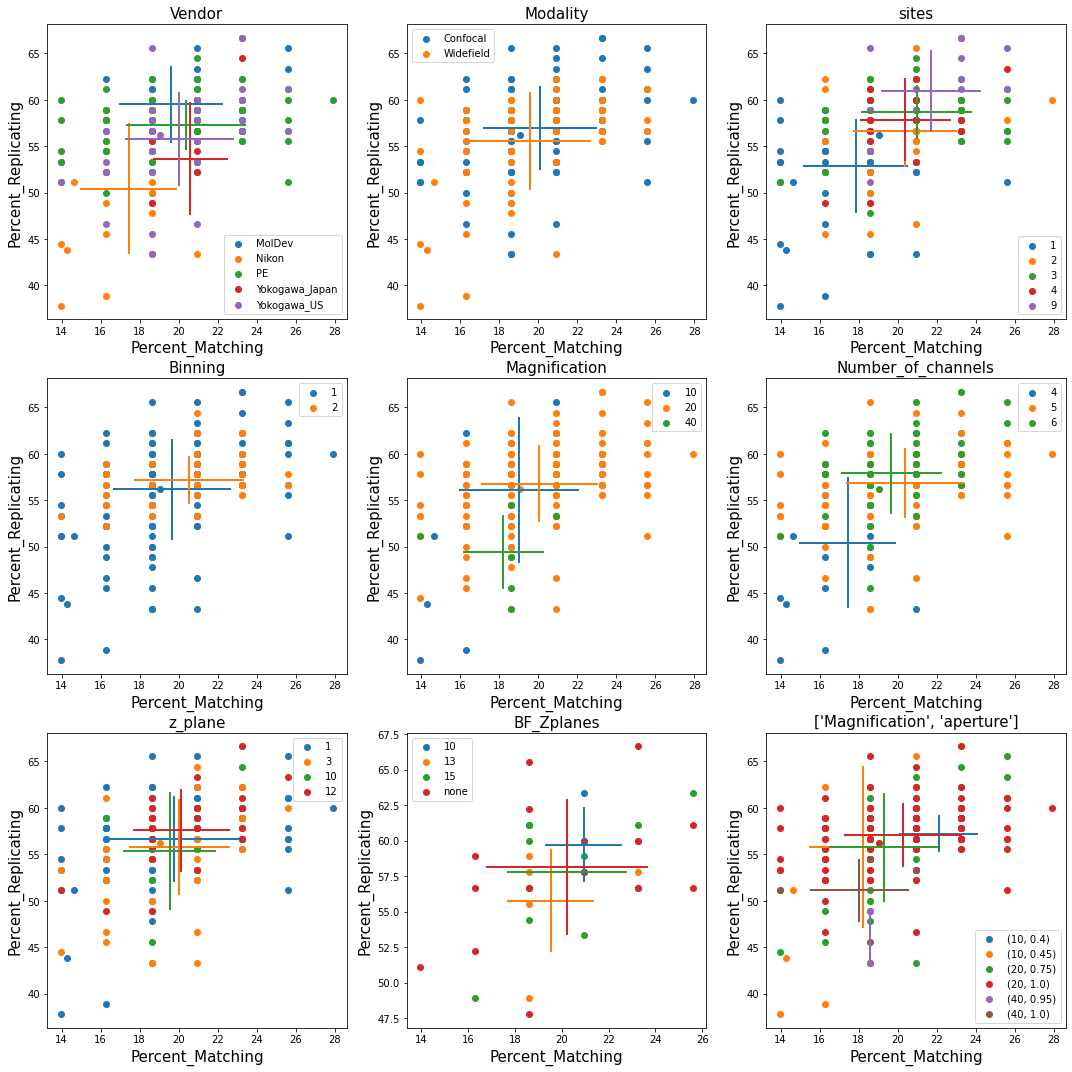

In [16]:
group_columns = ["Vendor", "Modality", "sites", 
                "Binning", "Magnification", "Number_of_channels", "z_plane", 
                "BF_Zplanes", ["Magnification", "aperture"]]
subplots = np.arange(len(group_columns)).reshape(-1,3).shape


additional_cols = {
    "col1": ["cell_count", "Mean_Cell_Count", lambda x: np.mean(x)],
    "col2": ["cell_count", "SD_Cell_Count", lambda z: float('%.3f'%np.std(z))]
}

df_subset = match_rep_df[
                        (match_rep_df["sphering"] == True) 
                        ]

# group_df = utilssphering.find_group_avg_df(df_subset, "Vendor", add_cols=additional_cols)
# group_df

fig, ax = plt.subplots(subplots[0], subplots[1], figsize=(15,15))
for i, _ax in zip(group_columns, ax.flatten()):
    try:
        group_df = utilssphering.find_group_avg_df(df_subset, i, add_cols=additional_cols)
    except:
        print("Found ya None")
    try:
        utilssphering.group_plot(
            df=group_df, 
            x="Mean_Percent_Matching", 
            y="Mean_Percent_Replicating",
            group=i,
            error_x="SD_Percent_Matching",
            error_y="SD_Percent_Replicating",
            fig=fig,
            ax_=_ax
        )
        utilssphering.group_plot(df_subset, "Percent_Matching", "Percent_Replicating", group=i, fig=fig, ax_=_ax, legend=True)
    except Exception as e:
        print(e)
        fig.delaxes(_ax)
# fig.savefig("figures/rep_vs_match-for-all-samples_WITH_ERROR.png")


# Creating mean and SD columns for grouped DF

In [168]:


utilssphering.find_group_avg_df(match_rep_df.loc[match_rep_df["sphering"]==True], "Vendor")

,Percent_Replicating,Mean_Percent_Replicating,SD_Percent_Replicating,Percent_Matching,Mean_Percent_Matching,SD_Percent_Matching,Vendor
0,"[47.77777777777778, 56.66666666666666, 62.2222...",59.700855,4.649,"[18.6046511627907, 18.6046511627907, 20.930232...",19.856887,2.972,MolDev
1,"[55.55555555555556, 43.333333333333336, 43.333...",51.572356,6.952,"[16.27906976744186, 20.930232558139537, 13.953...",17.769135,2.587,Nikon
2,"[53.333333333333336, 54.44444444444444, 50.0, ...",57.461988,2.936,"[13.953488372093023, 18.6046511627907, 16.2790...",20.171359,3.209,PE
3,"[52.22222222222223, 42.22222222222222, 54.4444...",53.015873,7.267,"[20.930232558139537, 18.6046511627907, 23.2558...",21.594684,2.396,Yokogawa_Japan
4,"[54.44444444444444, 47.77777777777778, 43.3333...",55.978512,5.086,"[18.6046511627907, 16.27906976744186, 18.60465...",20.170140,2.731,Yokogawa_US


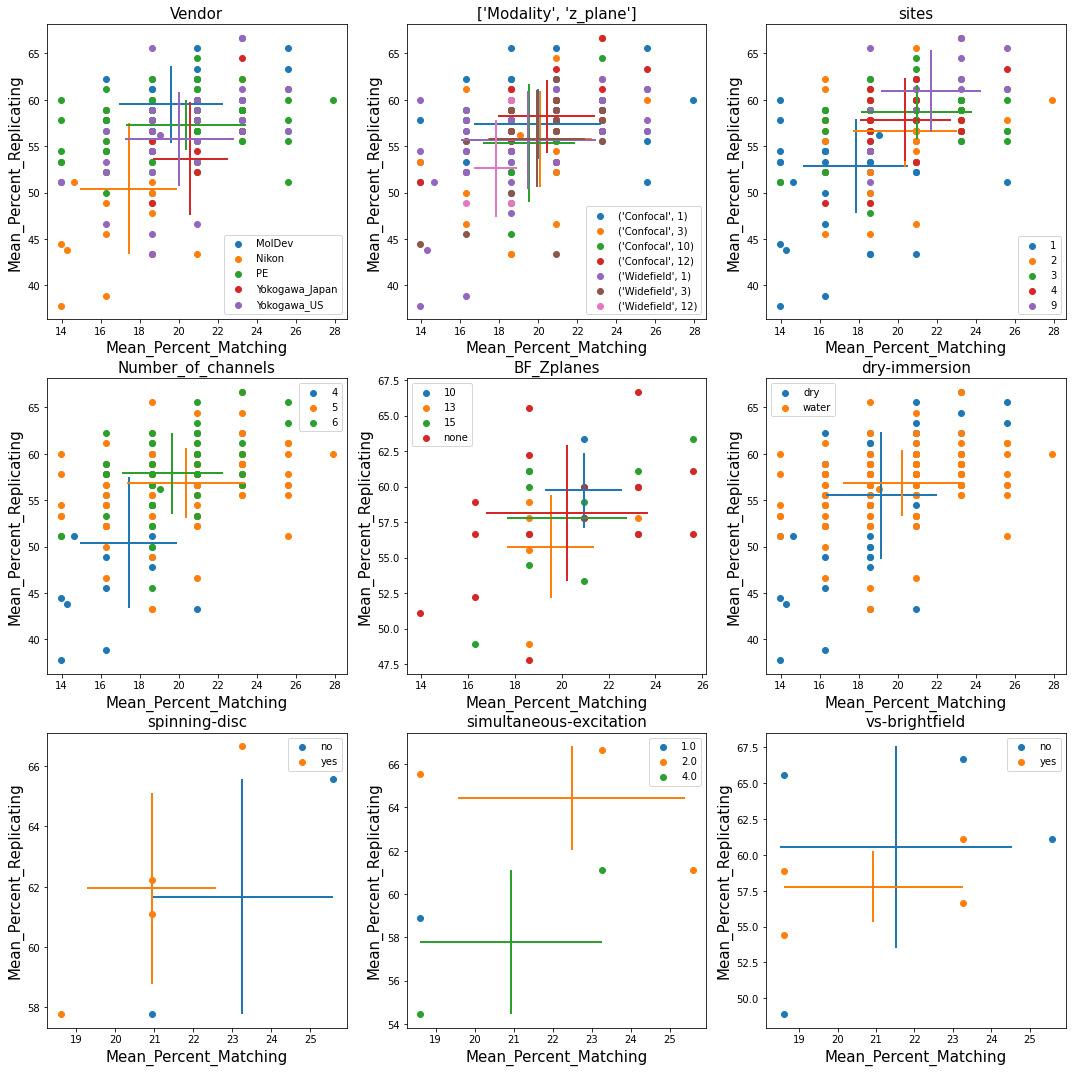

In [23]:
group_columns = ["Vendor", ["Modality", "z_plane"], "sites", 
                "Number_of_channels", "BF_Zplanes", "dry-immersion", 
                "spinning-disc", "simultaneous-excitation", "vs-brightfield"]

df_subset = match_rep_df[(match_rep_df["sphering"] == True)]

subplots = np.arange(len(group_columns)).reshape(-1,3).shape
fig, ax = plt.subplots(subplots[0], subplots[1], figsize=(15,15))
for i, _ax in zip(group_columns, ax.flatten()):
    try:
        group_df = utilssphering.find_group_avg_df(df_subset, i)
        # Plot the scatter
        utilssphering.group_plot(
            df=df_subset,
            x="Percent_Matching", 
            y="Percent_Replicating",
            group=i,
            fig=fig,
            ax_=_ax,
            legend=True
        )
        # Plot the errorbars
        utilssphering.group_plot(
            df=group_df, 
            x="Mean_Percent_Matching", 
            y="Mean_Percent_Replicating",
            group=i,
            error_x="SD_Percent_Matching",
            error_y="SD_Percent_Replicating",
            fig=fig,
            ax_=_ax
        )
    except Exception as e:
        fig.delaxes(_ax)
        
# fig.savefig("figures/mean-for-ALL-scope-groupings.png")

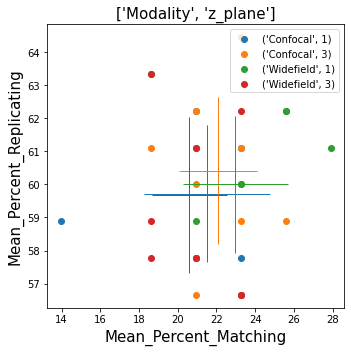

In [147]:
group_columns = [["Modality", "z_plane"], None, None]

df_subset = match_rep_df[(~match_rep_df["Batch"].str.contains("siteSubSample")) & 
                        (match_rep_df["sphering"] == True) 
                        # Drop the 10 z_plane data since there's only one
                        & (~match_rep_df["z_plane"].isin([10])) &
                        (match_rep_df["Vendor"].str.contains("PE"))]

subplots = np.arange(len(group_columns)).reshape(-1,3).shape
fig, ax = plt.subplots(subplots[0], subplots[1], figsize=(15,5))
for i, _ax in zip(group_columns, ax.flatten()):
    try:
        group_df = utilssphering.find_group_avg_df(df_subset, i)
        # Plot the scatter
        utilssphering.group_plot(
            df=df_subset,
            x="Percent_Matching", 
            y="Percent_Replicating",
            group=i,
            fig=fig,
            ax_=_ax,
            legend=True
        )
        # Plot the errorbars
        utilssphering.group_plot(
            df=group_df, 
            x="Mean_Percent_Matching", 
            y="Mean_Percent_Replicating",
            group=i,
            error_x="SD_Percent_Matching",
            error_y="SD_Percent_Replicating",
            fig=fig,
            ax_=_ax
        )

    except:
        fig.delaxes(_ax)
        
fig.savefig("figures/mean-for-modality_z-plane_PE_ONLY.png")

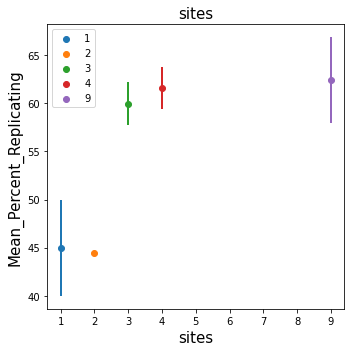

In [309]:
group_columns = ["sites", None, None]

df_subset = match_rep_df[(~match_rep_df["Batch"].str.contains("siteSubSample")) & 
                        (match_rep_df["sphering"] == True) 
                        ]

subplots = np.arange(len(group_columns)).reshape(-1,3).shape
fig, ax = plt.subplots(subplots[0], subplots[1], figsize=(15,5))
for i, _ax in zip(group_columns, ax.flatten()):
    # group_df = utilssphering.find_group_avg_df(df_subset, i)
    # print(group_df)
    try:
        group_df = utilssphering.find_group_avg_df(df_subset, i)
        
        # Plot the scatter
        utilssphering.group_plot(
            df=group_df,
            x=i, 
            y="Mean_Percent_Replicating",
            group=i,
            fig=fig,
            ax_=_ax,
            legend=True
        )
        # Plot the errorbars
        utilssphering.group_plot(
            df=group_df, 
            x=i, 
            y="Mean_Percent_Replicating",
            group=i,
            # error_x="SD_Percent_Replicating",
            error_y="SD_Percent_Replicating",
            fig=fig,
            ax_=_ax
        )
    except:
        fig.delaxes(_ax)
        
# fig.savefig("figures/mean_rep-against-sites.png")

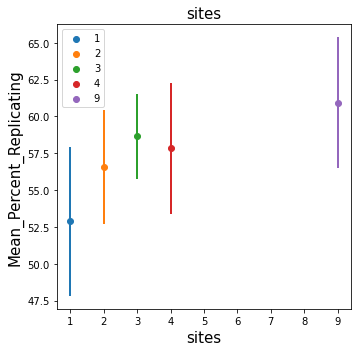

In [17]:
group_columns = ["sites", None, None]

df_subset = match_rep_df[
                        (match_rep_df["sphering"] == True) 
                        ]

subplots = np.arange(len(group_columns)).reshape(-1,3).shape
fig, ax = plt.subplots(subplots[0], subplots[1], figsize=(15,5))
for i, _ax in zip(group_columns, ax.flatten()):
    # group_df = utilssphering.find_group_avg_df(df_subset, i)
    # print(group_df)
    try:
        group_df = utilssphering.find_group_avg_df(df_subset, i)
        
        # Plot the scatter
        utilssphering.group_plot(
            df=group_df,
            x=i, 
            y="Mean_Percent_Replicating",
            group=i,
            fig=fig,
            ax_=_ax,
            legend=True
        )
        # Plot the errorbars
        utilssphering.group_plot(
            df=group_df, 
            x=i, 
            y="Mean_Percent_Replicating",
            group=i,
            # error_x="SD_Percent_Replicating",
            error_y="SD_Percent_Replicating",
            fig=fig,
            ax_=_ax
        )
    except:
        fig.delaxes(_ax)
        
fig.savefig("figures/mean_rep-against-sites_ALL_SAMPLES.png")

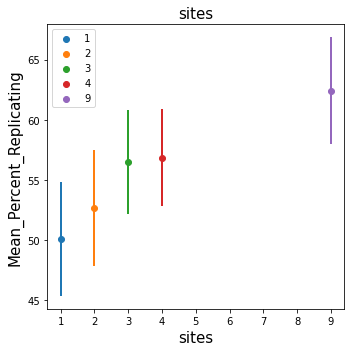

In [312]:
# Plot profile subsamples that originally had 9 images per well

# %autoreload 2
# import utilssphering

group_columns = ["sites", None, None]

plot_plates = ["Plate2_PCO_6ch_9site_20XPA",
                "Plate3_PCO_6ch_9site_20XPA_Crest",
                "BR00117061a",
                "BR00117062a",
                "BR00117063b",
                "20201021T092317",
                "BRO0117033_20xb",
                "BRO0117056_20x",
                "BRO0117056_20xb",
                "BRO0117059_20X",
                "BRO01177034_20x",
                "BRO0117059_40x"]

df_subset = match_rep_df[(match_rep_df["Assay_Plate_Barcode"].str.contains("|".join(plot_plates))) & 
                        (match_rep_df["sphering"] == True) 
                        ]

subplots = np.arange(len(group_columns)).reshape(-1,3).shape
fig, ax = plt.subplots(subplots[0], subplots[1], figsize=(15,5))
for i, _ax in zip(group_columns, ax.flatten()):
    try:
        group_df = utilssphering.find_group_avg_df(df_subset, i)
        # Plot the scatter
        utilssphering.group_plot(
            df=group_df,
            x=i, 
            y="Mean_Percent_Replicating",
            group=i,
            fig=fig,
            ax_=_ax,
            legend=True
        )
        # Plot the errorbars
        utilssphering.group_plot(
            df=group_df, 
            x=i, 
            y="Mean_Percent_Replicating",
            group=i,
            # error_x="SD_Percent_Replicating",
            error_y="SD_Percent_Replicating",
            fig=fig,
            ax_=_ax
        )
    except:
        fig.delaxes(_ax)
        
fig.savefig("figures/mean_rep-against-subsampled-sites(9-profiles-only).png")


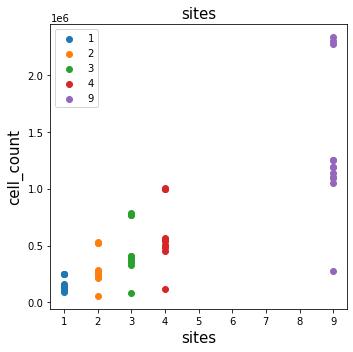

In [323]:
# Plot profile sites vs cell counts


group_columns = ["sites", None, None]

plot_plates = match_rep_df[match_rep_df["sites"] == 9]["Assay_Plate_Barcode"].values

# "\\b" sets a boundary on the word, ensuring that exact string matches are made and not substrings
df_subset = match_rep_df[(match_rep_df["Assay_Plate_Barcode"].str.contains("\\b|".join(plot_plates))) & 
                        (match_rep_df["sphering"] == True) 
                        ]

subplots = np.arange(len(group_columns)).reshape(-1,3).shape
fig, ax = plt.subplots(subplots[0], subplots[1], figsize=(15,5))
for i, _ax in zip(group_columns, ax.flatten()):
    try:
        group_df = utilssphering.find_group_avg_df(df_subset, i)
        # Plot the scatter
        utilssphering.group_plot(
            df=df_subset,
            x=i, 
            y="cell_count",
            group=i,
            fig=fig,
            ax_=_ax,
            legend=True
        )
        # # Plot the errorbars
        # utilssphering.group_plot(
        #     df=group_df, 
        #     x=i, 
        #     y="Mean_Percent_Replicating",
        #     group=i,
        #     # error_x="SD_Percent_Replicating",
        #     error_y="SD_Percent_Replicating",
        #     fig=fig,
        #     ax_=_ax
        # )
    except:
        fig.delaxes(_ax)
        
fig.savefig("figures/cell_count-vs-sites-for-subsampled-sites(9-profiles-only).png")

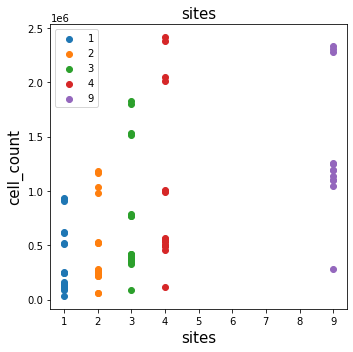

In [14]:
# Plot profile sites vs cell counts


group_columns = ["sites", None, None]

plot_plates = match_rep_df[match_rep_df["sites"] == 9]["Assay_Plate_Barcode"].values

# "\\b" sets a boundary on the word, ensuring that exact string matches are made and not substrings
df_subset = match_rep_df[
                        (match_rep_df["sphering"] == True) 
                        ]

subplots = np.arange(len(group_columns)).reshape(-1,3).shape
fig, ax = plt.subplots(subplots[0], subplots[1], figsize=(15,5))
for i, _ax in zip(group_columns, ax.flatten()):
    try:
        group_df = utilssphering.find_group_avg_df(df_subset, i)
        # Plot the scatter
        utilssphering.group_plot(
            df=df_subset,
            x=i, 
            y="cell_count",
            group=i,
            fig=fig,
            ax_=_ax,
            legend=True
        )
        # # Plot the errorbars
        # utilssphering.group_plot(
        #     df=group_df, 
        #     x=i, 
        #     y="Mean_Percent_Replicating",
        #     group=i,
        #     # error_x="SD_Percent_Replicating",
        #     error_y="SD_Percent_Replicating",
        #     fig=fig,
        #     ax_=_ax
        # )
    except:
        fig.delaxes(_ax)
        
fig.savefig("figures/cell_count-vs-sites_ALL_PROFILES.png")

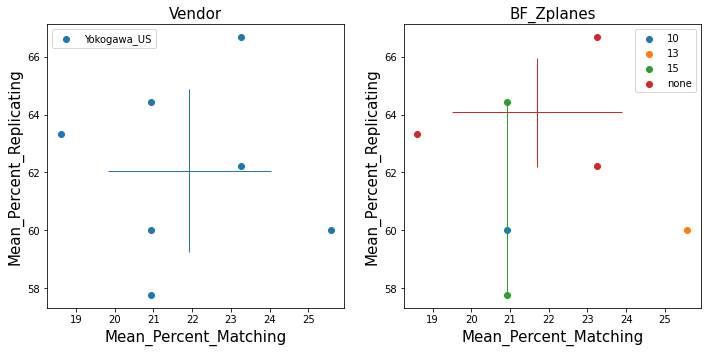

In [ ]:
# YokogawaUS brightfield z planes only (since these are the only true brightfield plots)
group_columns = ["Vendor", "BF_Zplanes", None]

df_subset = match_rep_df[(~match_rep_df["Batch"].str.contains("siteSubSample")) & 
                        (match_rep_df["sphering"] == True) &
                        # Drop the 10 z_plane data since there's only one
                        (match_rep_df["Vendor"].str.contains("Yokogawa_US"))]

subplots = np.arange(len(group_columns)).reshape(-1,3).shape
fig, ax = plt.subplots(subplots[0], subplots[1], figsize=(15,5))
for i, _ax in zip(group_columns, ax.flatten()):
    try:
        group_df = utilssphering.find_group_avg_df(df_subset, i)
        # Plot the scatter
        utilssphering.group_plot(
            df=df_subset,
            x="Percent_Matching", 
            y="Percent_Replicating",
            group=i,
            fig=fig,
            ax_=_ax,
            legend=True
        )
        # Plot the errorbars
        utilssphering.group_plot(
            df=group_df, 
            x="Mean_Percent_Matching", 
            y="Mean_Percent_Replicating",
            group=i,
            error_x="SD_Percent_Matching",
            error_y="SD_Percent_Replicating",
            fig=fig,
            ax_=_ax
        )

    except:
        fig.delaxes(_ax)
        
fig.savefig("figures/mean-for-brightfield-z-plane_YokogawaUS_ONLY.png")

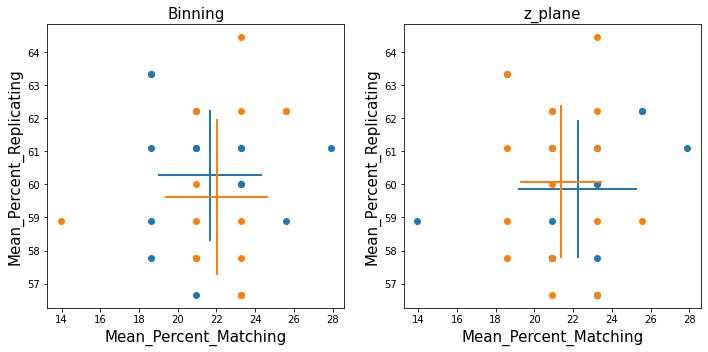

In [46]:
group_columns = ["Binning", "z_plane", "None"]

df_subset = match_rep_df[(~match_rep_df["Batch"].str.contains("siteSubSample")) & (match_rep_df["sphering"] == True) & (match_rep_df["Vendor"] == "PE")]

subplots = np.arange(len(group_columns)).reshape(-1,3).shape
fig, ax = plt.subplots(subplots[0], subplots[1], figsize=(15,5))
for i, _ax in zip(group_columns, ax.flatten()):
    try:
        group_df = utilssphering.find_group_avg_df(df_subset, i)
        utilssphering.group_plot(
            df=df_subset,
            x="Percent_Matching", 
            y="Percent_Replicating",
            group=i,
            fig=fig,
            ax_=_ax
        )
        utilssphering.group_plot(
            df=group_df, 
            x="Mean_Percent_Matching", 
            y="Mean_Percent_Replicating",
            group=i,
            error_x="SD_Percent_Matching",
            error_y="SD_Percent_Replicating",
            fig=fig, 
            ax_=_ax
        )
    except:
        fig.delaxes(_ax)

fig.savefig("figures/PE-binning-only_sphering_TRUE_PE_ONLY.png")

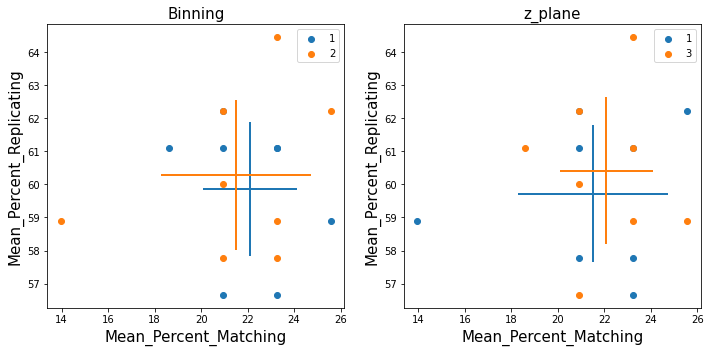

In [51]:
group_columns = ["Binning", "z_plane", None]

df_subset = match_rep_df[(~match_rep_df["Batch"].str.contains("siteSubSample")) & (match_rep_df["sphering"] == True) & (match_rep_df["Vendor"] == "PE") & (match_rep_df["Modality"] == "Confocal")]

subplots = np.arange(len(group_columns)).reshape(-1,3).shape
fig, ax = plt.subplots(subplots[0], subplots[1], figsize=(15,5))
for i, _ax in zip(group_columns, ax.flatten()):
    try:
        group_df = utilssphering.find_group_avg_df(df_subset, i)
        utilssphering.group_plot(
            df=df_subset,
            x="Percent_Matching", 
            y="Percent_Replicating",
            group=i,
            fig=fig,
            ax_=_ax,
            legend=True
        )
        utilssphering.group_plot(
            df=group_df, 
            x="Mean_Percent_Matching", 
            y="Mean_Percent_Replicating",
            group=i,
            error_x="SD_Percent_Matching",
            error_y="SD_Percent_Replicating",
            fig=fig, 
            ax_=_ax
        )
    except:
        fig.delaxes(_ax)
fig.savefig("figures/PE-binning-zplane_PE_ONLY_CONFOCAL.png")

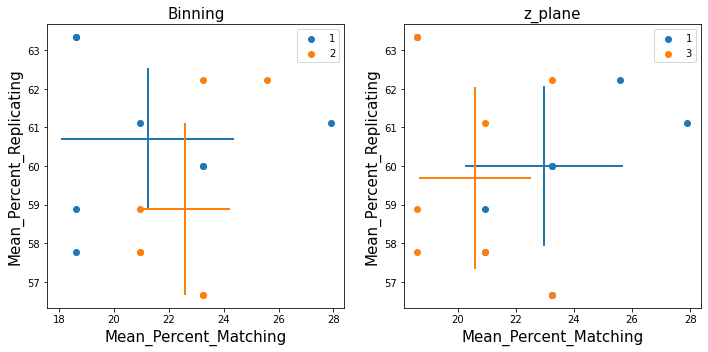

In [52]:
group_columns = ["Binning", "z_plane", None]

df_subset = match_rep_df[(~match_rep_df["Batch"].str.contains("siteSubSample")) & (match_rep_df["sphering"] == True) & (match_rep_df["Vendor"] == "PE") & (match_rep_df["Modality"] == "Widefield")]

subplots = np.arange(len(group_columns)).reshape(-1,3).shape
fig, ax = plt.subplots(subplots[0], subplots[1], figsize=(15,5))
for i, _ax in zip(group_columns, ax.flatten()):
    try:
        group_df = utilssphering.find_group_avg_df(df_subset, i)
        utilssphering.group_plot(
            df=df_subset,
            x="Percent_Matching", 
            y="Percent_Replicating",
            group=i,
            fig=fig,
            ax_=_ax,
            legend=True
        )
        utilssphering.group_plot(
            df=group_df, 
            x="Mean_Percent_Matching", 
            y="Mean_Percent_Replicating",
            group=i,
            error_x="SD_Percent_Matching",
            error_y="SD_Percent_Replicating",
            fig=fig, 
            ax_=_ax
        )
    except:
        fig.delaxes(_ax)
fig.savefig("figures/PE-binning-zplane_PE_ONLY_WIDEFIELD.png")

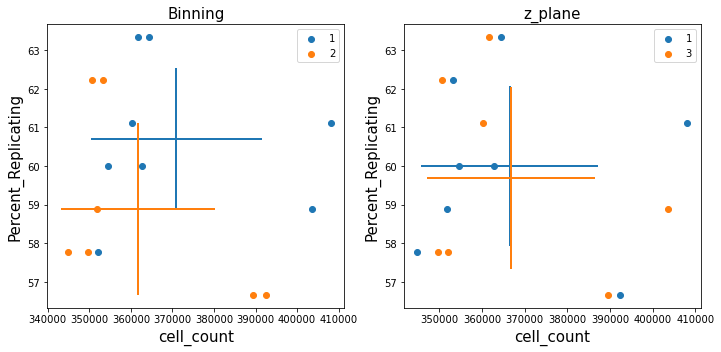

In [69]:
group_columns = ["Binning", "z_plane", None]

df_subset = match_rep_df[(~match_rep_df["Batch"].str.contains("siteSubSample")) & (match_rep_df["sphering"] == True) & (match_rep_df["Vendor"] == "PE") & (match_rep_df["Modality"] == "Widefield")]

additional_cols = {
    "col1": ["cell_count", "Mean_Cell_Count", lambda x: np.mean(x)],
    "col2": ["cell_count", "SD_Cell_Count", lambda z: float('%.3f'%np.std(z))]
}

subplots = np.arange(len(group_columns)).reshape(-1,3).shape
fig, ax = plt.subplots(subplots[0], subplots[1], figsize=(15,5))
for i, _ax in zip(group_columns, ax.flatten()):
    try:
        group_df = utilssphering.find_group_avg_df(df_subset, i, add_cols=additional_cols)
        utilssphering.group_plot(
            df=group_df, 
            x="Mean_Cell_Count", 
            y="Mean_Percent_Replicating",
            group=i,
            error_x="SD_Cell_Count",
            error_y="SD_Percent_Replicating",
            fig=fig, 
            ax_=_ax
        )
        utilssphering.group_plot(
            df=df_subset,
            x="cell_count", 
            y="Percent_Replicating",
            group=i,
            fig=fig,
            ax_=_ax,
            legend=True
        )

    except:
        fig.delaxes(_ax)
# fig.savefig("figures/PE-binning-zplane_PE_ONLY_WIDEFIELD.png")

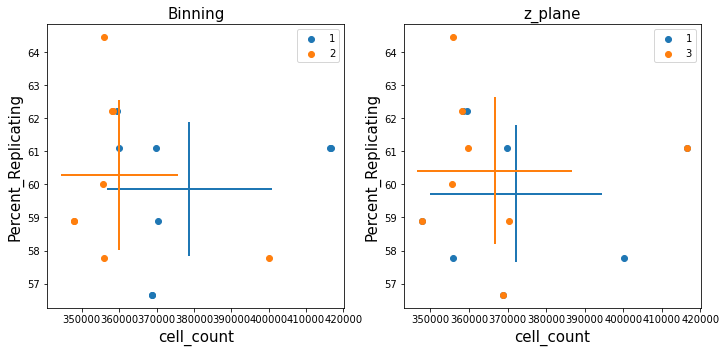

In [70]:
group_columns = ["Binning", "z_plane", None]

df_subset = match_rep_df[(~match_rep_df["Batch"].str.contains("siteSubSample")) & (match_rep_df["sphering"] == True) & (match_rep_df["Vendor"] == "PE") & (match_rep_df["Modality"] == "Confocal")]

additional_cols = {
    "col1": ["cell_count", "Mean_Cell_Count", lambda x: np.mean(x)],
    "col2": ["cell_count", "SD_Cell_Count", lambda z: float('%.3f'%np.std(z))]
}

subplots = np.arange(len(group_columns)).reshape(-1,3).shape
fig, ax = plt.subplots(subplots[0], subplots[1], figsize=(15,5))
for i, _ax in zip(group_columns, ax.flatten()):
    try:
        group_df = utilssphering.find_group_avg_df(df_subset, i, add_cols=additional_cols)
        utilssphering.group_plot(
            df=group_df, 
            x="Mean_Cell_Count", 
            y="Mean_Percent_Replicating",
            group=i,
            error_x="SD_Cell_Count",
            error_y="SD_Percent_Replicating",
            fig=fig, 
            ax_=_ax
        )
        utilssphering.group_plot(
            df=df_subset,
            x="cell_count", 
            y="Percent_Replicating",
            group=i,
            fig=fig,
            ax_=_ax,
            legend=True
        )

    except:
        fig.delaxes(_ax)
# fig.savefig("figures/PE-binning-zplane_PE_ONLY_WIDEFIELD.png")

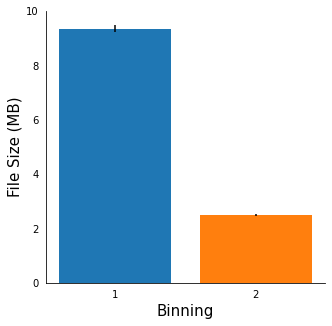

In [85]:
df_subset = match_rep_df[(~match_rep_df["Batch"].str.contains("siteSubSample")) & (match_rep_df["sphering"] == True) & (match_rep_df["Vendor"] == "PE")]

additional_cols = {
    "col1": ["Size_MB", "Mean_Size_MB", lambda x: np.mean(x)],
    "col2": ["Size_MB", "std_Size_MB", lambda z: float('%.3f'%np.std(z))]
}
group_df = utilssphering.find_group_avg_df(df_subset, "Binning", add_cols=additional_cols)
group_df

cmap = plt.cm.tab10
colour_palette = list()
for i in range(cmap.N):
    colour_palette.append(cmap(i))

fig, ax = plt.subplots(figsize=(5,5))
ax.bar(group_df["Binning"], group_df["Mean_Size_MB"], yerr=group_df["std_Size_MB"], color=[colour_palette[0], colour_palette[1]])
ax.set_xticks(group_df["Binning"], group_df["Binning"])
ax.set_xlabel("Binning", fontsize=15)
ax.set_ylabel("File Size (MB)", fontsize=15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.tick_params(axis="both", which="both", bottom=False, left=False)
ax.yaxis.set_ticks(np.arange(0, 11, 2))
fig.set_facecolor("white")

# fig.savefig("figures/file-size-comparison-for-1-2-binning-PE_ONLY.png")

In [51]:
d = {"col1": ["Size_MB", "Mean_Size_MB", lambda x: np.mean(x)]}
for i in d.values():
    print(i[0])

Size_MB


In [30]:

df_subset["Size_MB"]
# group_df = utilssphering.find_group_avg_df(df_subset, "Binning")

# fig, 

280    9.526377
282    9.484644
284    9.352902
286    9.587195
288    9.427739
290    9.400030
292    9.294915
294    9.473822
296    9.361273
298    9.244346
300    9.078627
302    9.285376
304    9.352244
306    9.264655
308    9.139749
310    9.294386
312    2.527899
314    2.511724
316    2.496831
318    2.539198
320    2.469309
322    2.456927
324    2.444871
326    2.477545
328    2.519742
330    2.484223
332    2.449872
334    2.488858
336    2.446371
338    2.420490
340    2.449473
Name: Size_MB, dtype: float64

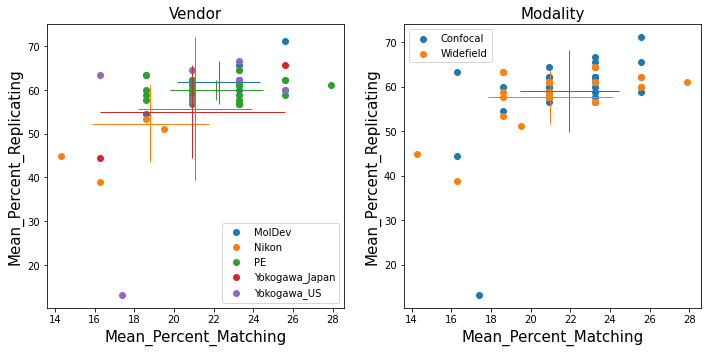

In [ ]:
group_columns = ["Vendor", "Modality", None]

df_subset = match_rep_df[(~match_rep_df["Batch"].str.contains("siteSubSample")) & (match_rep_df["sphering"] == True)]

subplots = np.arange(len(group_columns)).reshape(-1,3).shape
fig, ax = plt.subplots(subplots[0], subplots[1], figsize=(15,5))
for i, _ax in zip(group_columns, ax.flatten()):
    try:
        group_df = utilssphering.find_group_avg_df(df_subset, i)
        utilssphering.group_plot(
            df=df_subset,
            x="Percent_Matching", 
            y="Percent_Replicating",
            group=i,
            fig=fig,
            ax_=_ax
        )
        utilssphering.group_plot(
            df=group_df, 
            x="Mean_Percent_Matching", 
            y="Mean_Percent_Replicating",
            group=i,
            error_x="SD_Percent_Matching",
            error_y="SD_Percent_Replicating",
            fig=fig, 
            ax_=_ax
        )
    except:
        fig.delaxes(_ax)
# fig.savefig("figures/modality-only_sphering_TRUE.png")

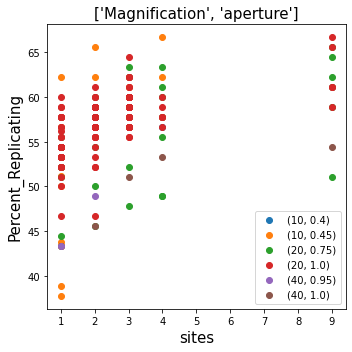

In [30]:
# A

group = ["Magnification", "aperture"]

df_subset = match_rep_df[
                        (match_rep_df["sphering"] == True) 
                        ]

group_df = utilssphering.find_group_avg_df(df_subset, group)

fig, ax = plt.subplots(figsize=(5,5))

# utilssphering.group_plot(
#     df=group_df,
#     x="sites", 
#     y="Mean_Percent_Replicating",
#     group=group,
#     # error_x="SD_Percent_Matching",
#     error_y="SD_Percent_Replicating",
#     fig=fig,
#     ax_=ax
# )
utilssphering.group_plot(
    df_subset, 
    "sites", 
    "Percent_Replicating", 
    group=group, 
    fig=fig, 
    ax_=ax, 
    legend=True)

# fig.savefig("(A)-rep-vs-match-mag_aperture.png")


TypeError: group_plot() got an unexpected keyword argument 'alpha'

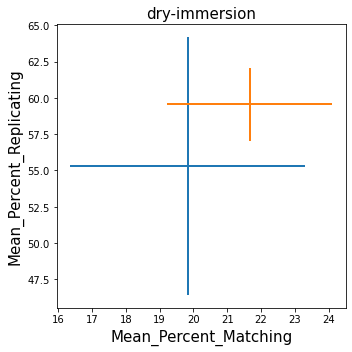

In [10]:
group = "dry-immersion"

df_subset = match_rep_df[
    (match_rep_df["sphering"] == True) &
    (~match_rep_df["Batch"].str.contains("siteSub")) 
    ]

group_df = utilssphering.find_group_avg_df(df_subset, group)

fig, ax = plt.subplots(figsize=(5,5))

utilssphering.group_plot(
    df=group_df, 
    x="Mean_Percent_Matching", 
    y="Mean_Percent_Replicating",
    group=group,
    error_x="SD_Percent_Matching",
    error_y="SD_Percent_Replicating",
    fig=fig,
    ax_=ax
)
utilssphering.group_plot(
    df_subset, 
    "Percent_Matching", 
    "Percent_Replicating", 
    group=group, 
    fig=fig, 
    ax_=ax, 
    legend=True,
    alpha=0.5
    )

# fig.savefig("(D)-rep-vs-match-vs_brightfield_dropout.png")

In [20]:
match_rep_df[(match_rep_df["Vendor"] == "Nikon") 
& (~match_rep_df["Batch"].str.contains("siteSub")) 
& match_rep_df["sphering"] == True]

,Vendor,Batch,Plate_Map_Name,Assay_Plate_Barcode,Modality,Images_per_well,Sites-SubSampled,Binning,Magnification,Number_of_channels,...,Size_MB_std,channel_names,brightfield_z_plane_used,feature_channels_found,sphering,value_95_replicating,Percent_Replicating,Percent_Matching,value_95_matching,cell_count
12,Nikon,Scope1_Nikon_10X,JUMP-MOA_compound_platemap,BR00117060a10x,Widefield,1,NaN,1,10,4,...,6.385516,"AGP, DNA, ER, Mito",NaN,"AGP, DNA, ER, Mito",True,0.234644,38.888889,16.279070,0.335728,929255
14,Nikon,Scope1_Nikon_10X,JUMP-MOA_compound_platemap,BR00117061a10x,Widefield,1,NaN,1,10,4,...,6.385516,"AGP, DNA, ER, Mito",NaN,"AGP, DNA, ER, Mito",True,0.247314,51.136364,14.634146,0.347065,938495
16,Nikon,Scope1_Nikon_10X,JUMP-MOA_compound_platemap,BR00117062a10x,Widefield,1,NaN,1,10,4,...,6.406565,"AGP, DNA, ER, Mito",NaN,"AGP, DNA, ER, Mito",True,0.211850,37.777778,13.953488,0.258467,925656
18,Nikon,Scope1_Nikon_10X,JUMP-MOA_compound_platemap,BR00117063b10x,Widefield,1,NaN,1,10,4,...,6.385516,"AGP, DNA, ER, Mito",NaN,"AGP, DNA, ER, Mito",True,0.197136,43.820225,14.285714,0.341967,910533
20,Nikon,Scope1_Nikon_20X,JUMP-MOA_compound_platemap,BR00117061a,Widefield,9,NaN,1,20,4,...,27.717153,"AGP, DNA, ER, Mito",NaN,"AGP, DNA, ER, Mito",True,0.250149,62.222222,23.255814,0.397392,2330204
22,Nikon,Scope1_Nikon_20X,JUMP-MOA_compound_platemap,BR00117062a,Widefield,9,NaN,1,20,4,...,27.728116,"AGP, DNA, ER, Mito",NaN,"AGP, DNA, ER, Mito",True,0.230285,58.888889,20.930233,0.364668,2301607
24,Nikon,Scope1_Nikon_20X,JUMP-MOA_compound_platemap,BR00117063b,Widefield,9,NaN,1,20,4,...,27.720264,"AGP, DNA, ER, Mito",NaN,"AGP, DNA, ER, Mito",True,0.317452,51.111111,18.604651,0.465301,2274867
